## Visulalisation de donées et Corona-virus

puisque le contexte est propice à l'analyse de données, voyons ce que l'on peut observer et conclure sur les données sur coronavirus.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Chargement du jeu de données: on va récupérer les données de Hubei (Chine), Corée du sud, France, Italie et Espagne.

In [2]:
data_cases_sk = np.array([]) 
data_cases_fr = np.array([]) 
data_cases_it = np.array([]) 
data_cases_es = np.array([]) 
data_cases_ch = np.array([]) 

for f in open("data/time_series_19-covid-Confirmed.csv"): 
    elt = f.split(",")
    if(elt[1]=="Country/Region"):
        date = elt[4:]
    if(elt[1]=="SKorea"): 
        data = elt[4:] 
        for d in data: 
            data_cases_sk = np.append(data_cases_sk,int(d))
    if(elt[0]=="Hubei"): 
        data = elt[4:] 
        for d in data: 
            data_cases_ch = np.append(data_cases_ch,int(d))
    if(elt[0]=="France"): 
        data = elt[4:] 
        for d in data: 
            data_cases_fr = np.append(data_cases_fr,int(d))
    if(elt[1]=="Italy"): 
        data = elt[4:] 
        for d in data: 
            data_cases_it = np.append(data_cases_it,int(d))
    if(elt[1]=="Spain"): 
        data = elt[4:] 
        for d in data: 
            data_cases_es = np.append(data_cases_es,int(d))
            
          

Regardons maintenant l'allure des différentes courbes (ici le nombre de cas détectés).

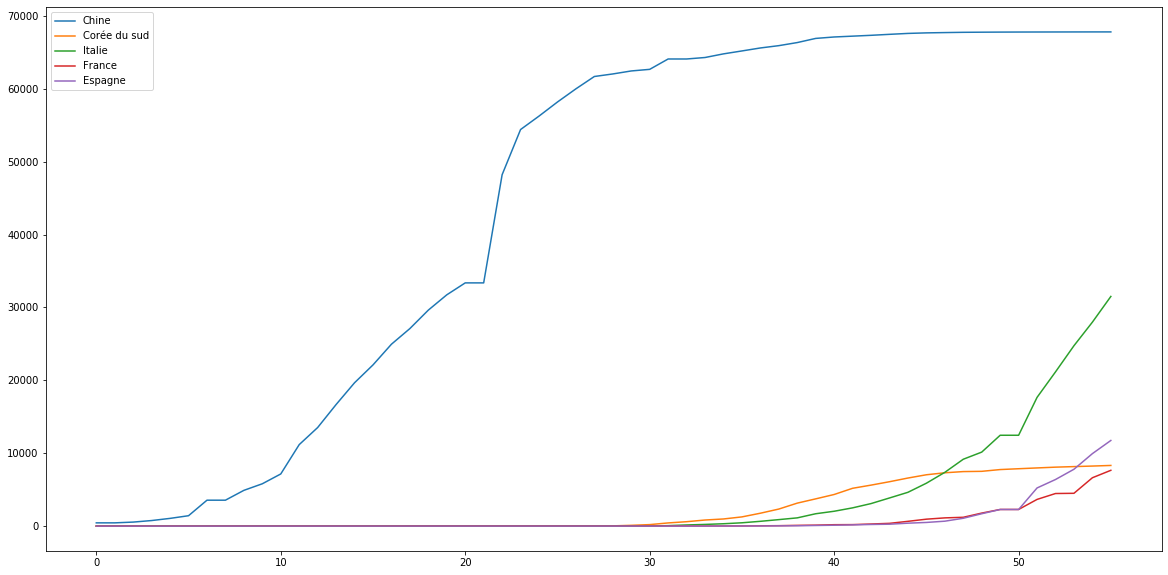

In [3]:
f = plt.figure(figsize=(20,10))
plt.plot(data_cases_ch,label="Chine")
plt.plot(data_cases_sk,label="Corée du sud")
plt.plot(data_cases_it,label="Italie")
plt.plot(data_cases_fr,label="France")
plt.plot(data_cases_es,label="Espagne")
plt.legend()
# plt.gca().set(xticks=date[0::5], xticklabels=date[0::5]);
# plt.xticks()
plt.show()

En regardant les dates, on voit que les données commencent au lockdown de Wuhan. Sur la courbe, on voit un événement autour de la case 20. En regardant la date correspondante et en utilisant le site https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_pandemic, peut-on donner une raison à ce changement brutal de comportement ?

**explication possible** : nouveau test rapide ?, redéfinition des contaminés ?

Une inspection rapide, montre que les échelles des différents pays ne permettent pas de voir les graphes correctement, on va donc passer en échelle log-lin.

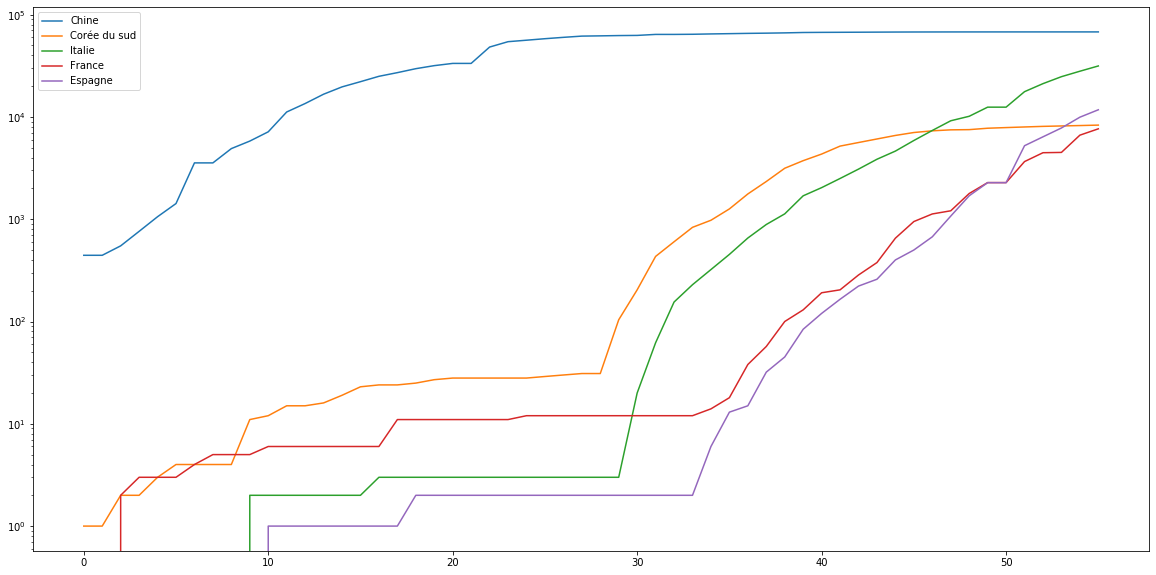

In [4]:
f = plt.figure(figsize=(20,10))
plt.semilogy(data_cases_ch,label="Chine")
plt.semilogy(data_cases_sk,label="Corée du sud")
plt.semilogy(data_cases_it,label="Italie")
plt.semilogy(data_cases_fr,label="France")
plt.semilogy(data_cases_es,label="Espagne")
plt.legend()
plt.show()

In [5]:
print("Bug china, d~",date[20])
print("Bug Corée, d~",date[27]," ",data_cases_sk[28])
print("Bug Italie d~",date[29])
print("Bug Espagne d~",date[33])

Bug china, d~ 2/11/20
Bug Corée, d~ 2/18/20   31.0
Bug Italie d~ 2/20/20
Bug Espagne d~ 2/24/20


Arrive-t-on à comprendre la brisure de la courbe de Corée du sud à l'aide de ces informations : https://thegroundtruthproject.org/timeline-how-south-korea-reacted-to-the-covid-19-outbreak/

**explication possible:** le patient 31 qui a fortement diffusé la maladie

Arrive-t-on à comprendre celle de l'italy (voir https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Italy)

**explication possible**: hommede 38 ans très actif socialement qui aurait transmis la maladie

Ces courbes sont assez difficile à analyser, non seulement les méthodes differs d'un pays à un autre mais en plus elle ne parte pas à la même date. Pour pallier à ce problème, on peut regarder le nombre de morts qui est sans doute plus "fidèle" à la réalité.

In [6]:
data_deaths_sk = np.array([]) 
data_deaths_fr = np.array([]) 
data_deaths_it = np.array([]) 
data_deaths_es = np.array([]) 
data_deaths_ch = np.array([]) 

for f in open("data/time_series_19-covid-Deaths.csv"): 
    elt = f.split(",") 
    if(elt[1]=="SKorea"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_sk = np.append(data_deaths_sk,int(d))
    if(elt[0]=="Hubei"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_ch = np.append(data_deaths_ch,int(d))
    if(elt[0]=="France"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_fr = np.append(data_deaths_fr,int(d))
    if(elt[1]=="Italy"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_it = np.append(data_deaths_it,int(d))
    if(elt[1]=="Spain"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_es = np.append(data_deaths_es,int(d))
            
# Correctino dataset            
data_deaths_fr[-1] = 175
data_deaths_fr[53] = 127
data_deaths_fr[50] = 61
data_deaths_fr[47] = 30          

data_deaths_it[39] = 41
data_deaths_it[50] = 1016

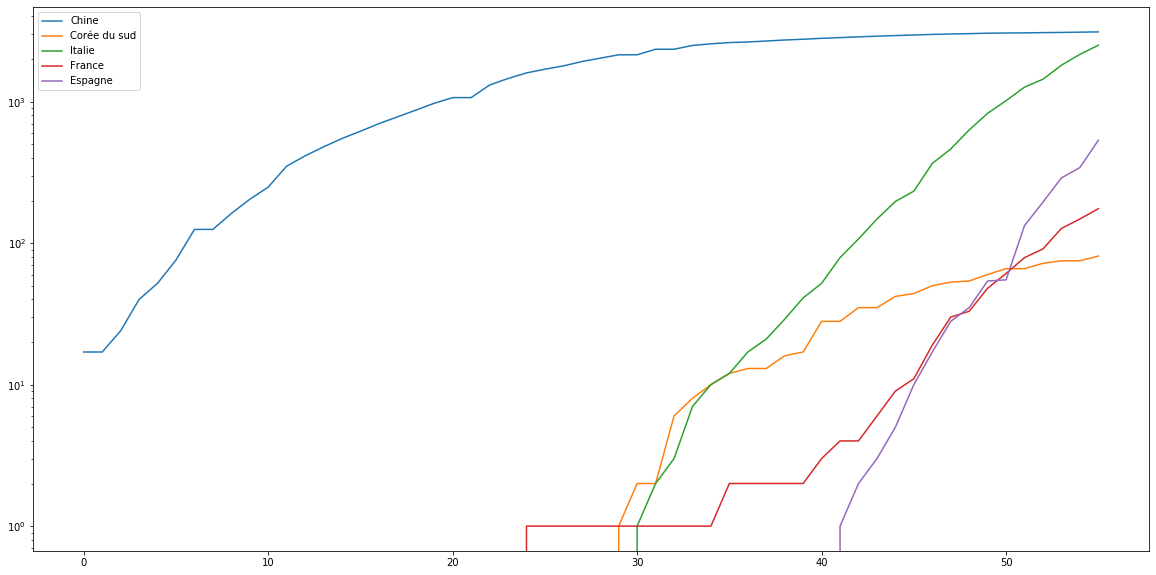

In [7]:
f = plt.figure(figsize=(20,10))
plt.plot(data_deaths_ch,label="Chine")
plt.plot(data_deaths_sk,label="Corée du sud")
plt.plot(data_deaths_it,label="Italie")
plt.plot(data_deaths_fr,label="France")
plt.semilogy(data_deaths_es,label="Espagne")
plt.legend()
plt.show()

On voit clairement qu'il semble y avoir pour plusieurs pays une croissance exponentielle (une ligne sur un graph log-lin). Peu-t-on déplacer l'abscisse pour voir si cet acroisssement est comparable ?

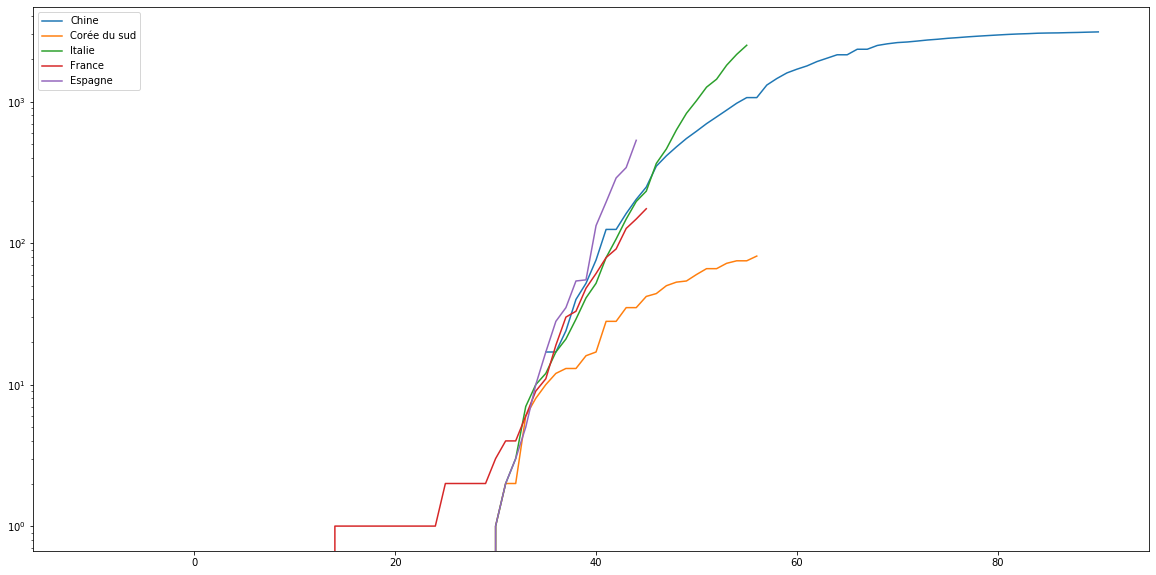

In [8]:
xr = np.arange(data_deaths_ch.shape[0])
f = plt.figure(figsize=(20,10))
Δ_ch = 35; plt.plot(xr+Δ_ch,data_deaths_ch,label="Chine")
Δ_sk=1;    plt.plot(xr+Δ_sk,data_deaths_sk,label="Corée du sud")
Δ_it=0;    plt.plot(xr+Δ_it,data_deaths_it,label="Italie")
Δ_fr=-10;  plt.plot(xr+Δ_fr,data_deaths_fr,label="France")
Δ_es=-11;  plt.semilogy(xr+Δ_es,data_deaths_es,label="Espagne")
plt.legend()
plt.show()

**Q:** Encore une fois, on a sur un même graphe différentes échelles présente. Comment peut-on faire pour visualiser correctement toutes les données ?

On passe en échelle log sur les y

**Q:** Qu'observe-t-on sur le graph une fois que les échelles sont visibles ? que signifie le fait d'avoir "une droite" ?

On voit que les différents pays suivent des allures similaires, et exponentielles

On a l'impression que les courbes présentes des similarités. Essayer en modifier l'abscisse pour regrouper les différentes courbes sur une même allure générale 

On semble voir au moins dans les début de l'épidémie un accroisement exponentiel du nombre de morts. On peut tenter d'abord de comprendre de combien est cet accroissement

In [9]:
def fit_exp(x,a,b):
    return np.exp(a*(x-b)) # A*np.exp(a*b), avec A=exp(-ab)
# on voit que pour x=30, on a environ 1 cas., cdt initiale pour un fit
a=0.2;b=30;

In [10]:
xr = np.arange(data_deaths_it.shape[0])
from scipy import optimize 
fitfunc = lambda p, x: np.exp((x-p[1])*p[0]) # Target function 
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target 
p0 = [0.2,30]
p1, success = optimize.leastsq(errfunc, p0[:], args=(xr[30:40],data_deaths_it[30:40]))

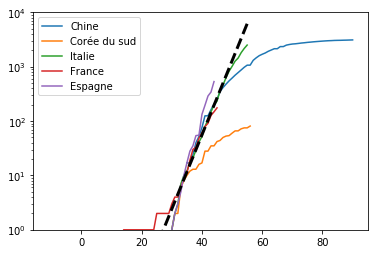

In [11]:

plt.plot(xr+Δ_ch,data_deaths_ch,label="Chine")
plt.plot(xr+Δ_sk,data_deaths_sk,label="Corée du sud")
plt.plot(xr+Δ_it,data_deaths_it,label="Italie")
plt.plot(xr+Δ_fr,data_deaths_fr,label="France")
plt.semilogy(xr+Δ_es,data_deaths_es,label="Espagne")
plt.semilogy(xr,fitfunc(p1,xr),ls='dashed',linewidth=3,color="black")
plt.ylim(1,10000)
plt.legend()
plt.show()

**Q:** Peut-on trouver sur ce graphe une droite qui semble témoigner de la pente de presque toutes les courbes ? Trouver la fonction et l'afficher sur le graphe

Oui, on utilise la fonction exponentielle.

On peut maintenant calculer le coefficient de doublement. Sachant que les x reprénsent le nombre de morts cumulés chaque jour: 

  1. à $t_0$, on a un nombre de morts cumulés de $e^{a(t_0-b)}$
  2. on cherche $t_1 = t_0+\alpha$ tel que $e^{a(t_0+\alpha-b)} = 2e^{a(t_0-b)}$
  
On obtient $\alpha = \frac{\log(2)}{a}$

In [12]:
α = np.log(2)/p1[0]
print("Période de doublement=",α,"jours")
print("Parametre de l'expo=",p1[0])

Période de doublement= 2.208190482587095 jours
Parametre de l'expo= 0.31389827373400353


### **Modélisation** : comment comprendre la croissance exponentielle (de façon simple)

On peut voir la croissance exponentielle dans la croissance des bactéries, de composées chimiques ou autre. Pour s'en rendre compte on utilise en général la modélisation suivante :

Soit une concentration $n(t)$ de bactéries au temps t. On considère qu'en moyenne, chaque bactéries va se reproduire par un facteur $\alpha$ par unité de temps. Evidement ici, le facteur $\alpha$ dépend du type de bactéries des conditions etc. Néanmoins, on aura donc en utilisant cette approximation

$$
n(t+\Delta t) \approx n(t) + \alpha n(t) \Delta t
$$

pour un incrément temporel $\Delta t$ pas trop grand. On peut donc ré-écrire l'équation précédente sous la forme

$$ 
\frac{n(t+\Delta t) - n(t)}{\Delta t} = \alpha n(t)
$$

A présent, on voit que lorsque $\Delta t$ devient de plus en plus petit, que le terme de droite va s(identifier avec la dérivée de $n(t)$ au temps $t$

$$
n'(t) = \alpha n(t)
$$

Maintenant, on peut soit résoudre l'équation différentielle précédente, soit se souvenir que la seule fonction qui a pour dérivée elle-même est la fonction exponetielle. On obtient donc

$$
n(t) = n(t=0)e^{\alpha t}
$$

Dans notre cas, le facteur de multiplication du virus est lié à combien de personnes il est possible de contaminer par unité de temps

#### **Saturation** (le cas de la Chine)

La Chine a pratiqué le confinement dans la région de Wuhan afin d'endiguer l'épidémie. On voit sur le graph du nombre de morts que celui sort de l'allure exponentielle et finit par atteindre une croissance pratiquement nulle.

Une façon d'obtenir une saturation, dans la description macroscopique de notre épidémie est de dire la chose suivante : lorsque le nombre d'individus devient grand, cela va réduire le taux de croissance (on peut imaginer plusieurs raisons, vous rencontrez des personnes déjà malades donc il y a moins de "proies" possibles, vous voyez moins de gens à cause de mesure de confinement dû à un grand nombre de contaminations ...).

On obtient alors l'équation suivante : 

$$
  \frac{dn(t)}{dt} = n(t)( \alpha - \beta n(t) )
$$

où cette fois-ci on a deux paramètres : $\alpha$ et $\beta$.

  * montrer que la solution peut s'écrire sous la forme $n(t) = \frac{a}{1+be^{-c x}}$ et identifier les paramètres $a,b,c$ à $n(t=0)$, $\alpha$ et $\beta$
  * (facultatif) résoudre l'équation différentielle ci-dessus en utilisant le changement de variable : $u(t) = 1/n(t)$
  

Vérifions que $n(t) = \frac{a}{1+be^{-c x}}$ est une solution et trouver comment $a$,$b$ et $c$ s'identifie aux autres paramètres.
  1. On voit que $n'(t) = \frac{acb e^{-ct}}{(1+be^{-ct})^2} = (cb/a) n^2(t) e^{-ct}$
  2. Par ailleurs, en utilisant l'expression de $n(t)$, on a : $be^{-ct} = (a/n(t) - 1)$
  3. On en conclut que $n'(t) = c n(t) - (c/a)n^2(t)$
  4. En utilisant l'équation différentielle on a 
  
  $$
    n'(t) = c n(t) - (c/a)n^2(t) = \alpha n(t) - \beta n^2(t)
  $$
 
  5. On peut donc identifier 
    * $c = \alpha$
    * $c/a = \beta$
    * $n(t=0) = n_0 = \frac{a}{1+b}$
  6. Donc : $c=\alpha$, $a=\alpha/\beta$ et $b=\alpha/(\beta n_0) - 1$
 
  
Cette solution est appelée fonction logistic. Regardons maintenant ce que l'on obtient si l'on ajuste la fonction sur la courbe chinoise :

In [13]:
xr = np.arange(data_deaths_ch.shape[0])

fit_logfunc = lambda p, x: p[0]/(1+np.exp(-p[1]*(x-p[2]))) # Target function 
errfunc = lambda p, x, y: fit_logfunc(p, x) - y # Distance to the target 
p0 = [0,0.16,10]
p1_l, success = optimize.leastsq(errfunc, p0[:], args=(xr,data_deaths_ch))

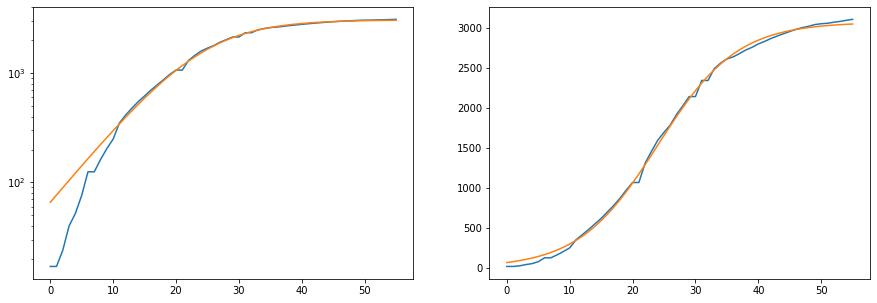

In [14]:
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(xr,data_deaths_ch,label="Chine")
ax[0].semilogy(xr,fit_logfunc(p1_l,xr))
ax[1].plot(xr,data_deaths_ch,label="Chine")
ax[1].plot(xr,fit_logfunc(p1_l,xr))
# plt.semilogy(xr,np.exp(fit_llogfunc(p1_ll,xr)))
plt.show()

On peut donc tenter d'inférer la valeur asymptotique : 

In [16]:
print("ASymptot=",fit_logfunc(p1_l,1000))
# ce qui est évidement sous estimé.

ASymptot= 3074.6222993918973


On peut tenter d'évaluer le pic de morts donnée par la function logistic et voir si elle semble coïncider avec les données.
On doit donc calculer le nombre de nouveaux cas par jours, ainsi que la dérivée de la fonction logistic

### Taux de mortalité et nombre de morts

Une fois ajustée la fonction logistic, on peut tenter de comprendre si celle-ci modélise correctement le tux de croissance de la mortalité et donc également le nombre de morts par jour.

#### <u> Taux de mortalité : </u>

Pour calculer le taux de mortalité, il faut regarder la variation du nombre de mort : $\Delta n = n(t+1) - n(t)$ et le rapporter au nombre total de mort à l'instant $t$ : 

$$
  \frac{\Delta n}{n(t)} = \frac{n(t+1)-n(t)}{n(t)} 
$$

Cette équation devient égale à $\alpha$ dans le cas d'une croissance exponentielle.

**Q:** En utilisant l'expression ci-dessus, calculer le taux de mortalité des morts chinois et le comparer à la prédiction donnée par la fonction exponentielle et par la fonction logistic.

### <u> Nombre de morts quotidien </u>

A partir des données choinoises, calculer le nombre de morts quotidien. Du point de vue des la modélisation cela revient à calculer la dérivée des fonctions utilisées pour ajuster les données.

**Q:**

  1. Calculer la dérivée de la fonction exponentielle $f(t)=n_0 e^{\alpha t}$
  2. Calculer la dérivée de la fonction logistic.
  3. Afficher le graphe de nombre de morts par jour en chine.
  4. Ce graph est-il cohérent avec la modélisation exponentielle ? (pas besoin de tracer la dérivée de la fonction pour répondre ici)
  5. Ce graph est-il cohérent avec la modélisation par la fonction logistic ? (afficher les données ainsi que la dérivée calculée)


    
    


 1. Dérivée de l'exponetielle : $f'(t) = \alpha n_0 e^{\alpha t}$
 2. Dérivée de la fonction logistic : si je prends $f(t) = \frac{a}{1+e^{-c(x-b)}}$, on obtient
 
 $$
   f'(t) = \frac{ace^{-c(x-b)}}{(1+e^{-c(x-b)})^2} = \frac{c}{a}f(t)^2 e^{-c(x-b)}
 $$

In [17]:
#taux de mortalité : 
deaths_rate_ch = np.zeros(data_deaths_ch.shape[0]-1)
deaths_rate_log = np.zeros(data_deaths_ch.shape[0]-1)
xr_dr = np.arange(data_deaths_ch.shape[0]-1)
for i in range(data_deaths_ch.shape[0]-1):
    deaths_rate_ch[i] = (data_deaths_ch[i+1]-data_deaths_ch[i])/data_deaths_ch[i]
    deaths_rate_log[i] = (fit_logfunc(p1_l,xr[i+1])-fit_logfunc(p1_l,xr[i]))/fit_logfunc(p1_l,xr[i])

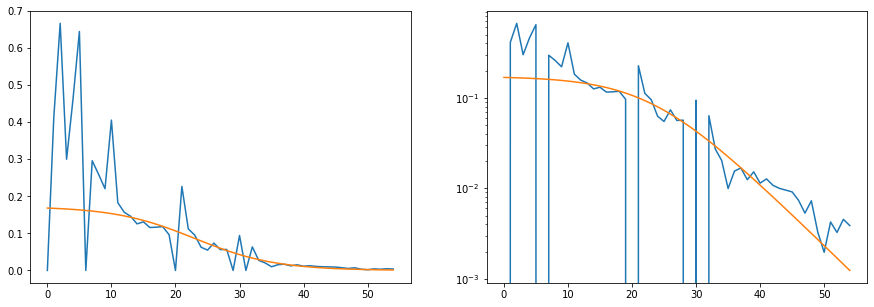

In [18]:
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(xr_dr,deaths_rate_ch)
ax[0].plot(xr_dr,deaths_rate_log)
ax[1].semilogy(xr_dr,deaths_rate_ch)
ax[1].semilogy(xr_dr,deaths_rate_log)
plt.show()

On voit que la courbe reproduit grossièrement le comportement observé, avec quelques problème sur les "bords"

In [19]:
nb_deaths_ch = np.zeros(data_deaths_ch.shape[0]-1)
for i in range(data_deaths_ch.shape[0]-1):
    nb_deaths_ch[i] = (data_deaths_ch[i+1]-data_deaths_ch[i])

Sur le nombre de morts

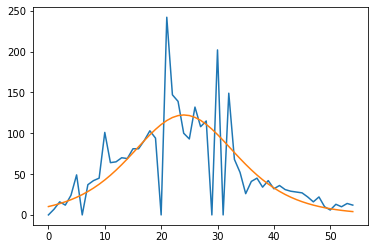

In [20]:
xr_der = np.arange(nb_deaths_ch.shape[0])
plt.plot(xr_der,nb_deaths_ch)
plt.plot(xr_der,fit_logfunc(p1_l,xr_der)**2*p1_l[1]/p1_l[0]*np.exp(-p1_l[1]*(xr_der-p1_l[2])))
plt.show()

On voit que le graphe cadre bien avec la fonction logistic. Dans le cas d'une croissance exponentielle, la courbe serait toujours croissante, on n'a donc pas besoin d'afficher la dérivée ici.

Que se passe-t-il si on utilise la fonction suivante

$$
  f(t) = A\exp(- \exp(-a(t-b)))
$$

qui correspond à la solution de l'équation différentielle suivante : 

$$
  \frac{dn(t)}{dt} = n(t)( \alpha - \beta \log(n(t)) )
$$

Comment comprendre les différents paramètres de la fonction (on suposera qu'ils sont tous positifs).

On a dans ces conditions :
  * $f(\infty) = A$
  * $f(t=b) = Ae^{-1}$
  * $f(-\infty) = 0$
  
on peut donc déjà interpréter $A$ comme l'asymptote au temps long. La variable $b$ correpond au moment où on a atteint une fraction $e^{-1}$ de l'asymptote ainsi qu'au régime linéare.

Ici, on reprendra l'analyse effectuée avec la fonction logistic et on comparera les résultats obtenus.

In [21]:
fit_gompfunc = lambda p, x: p[0]*np.exp(-np.exp(-p[2]*(x-p[1]))) # Target function 
errfunc = lambda p, x, y: fit_gompfunc(p, x) - y # Distance to the target 
p0 = [3000,25,0.01]
p1_g, success = optimize.leastsq(errfunc, p0[:], args=(xr,data_deaths_ch))
print(p1_g)

[3.25780446e+03 2.04709643e+01 9.60713536e-02]


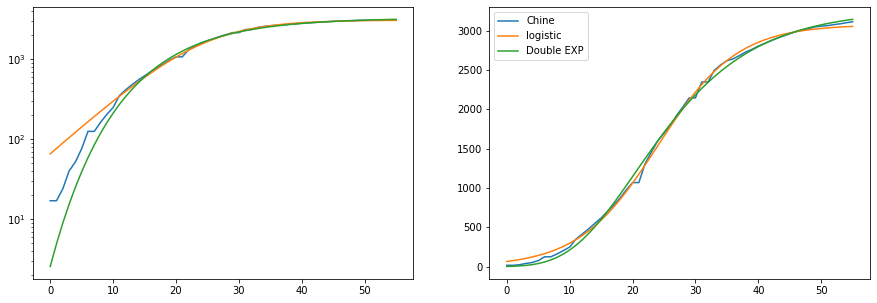

In [26]:
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(xr,data_deaths_ch,label="Chine")
ax[0].semilogy(xr,fit_logfunc(p1_l,xr),label="logistic")
ax[0].semilogy(xr,fit_gompfunc(p1_g,xr),label="Double EXP")
ax[1].plot(xr,data_deaths_ch,label="Chine")
ax[1].plot(xr,fit_logfunc(p1_l,xr),label="logistic")
ax[1].plot(xr,fit_gompfunc(p1_g,xr),label="Double EXP")
plt.legend()
plt.show()

On remarque que le fit semble être un peu meilleur.

In [28]:
#taux de mortalité :
deaths_rate_gomp = np.zeros(data_deaths_ch.shape[0]-1)
for i in range(data_deaths_ch.shape[0]-1):
    deaths_rate_gomp[i] = (fit_gompfunc(p1_g,xr[i+1])-fit_gompfunc(p1_g,xr[i]))/fit_gompfunc(p1_g,xr[i])

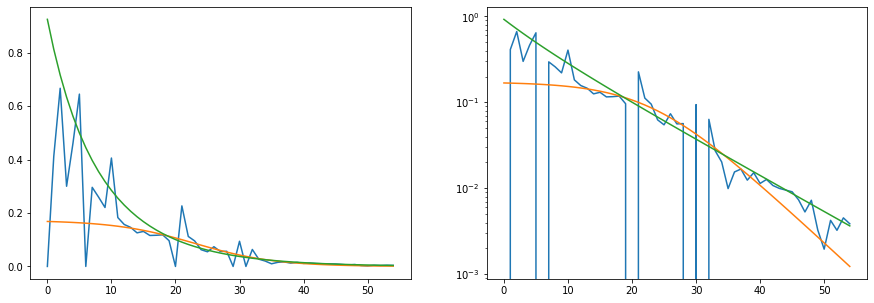

In [29]:
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(xr_dr,deaths_rate_ch)
ax[0].plot(xr_dr,deaths_rate_log)
ax[0].plot(xr_dr,deaths_rate_gomp)
ax[1].semilogy(xr_dr,deaths_rate_ch)
ax[1].semilogy(xr_dr,deaths_rate_log)
ax[1].semilogy(xr_dr,deaths_rate_gomp)
plt.show()

Ici, on reproduit mieux le comportement linéaire (en loglin) du taux de croissance.

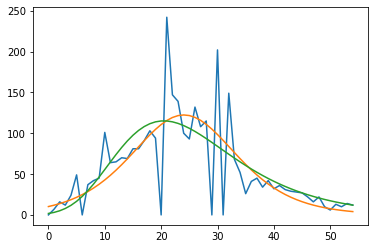

In [30]:
plt.plot(xr_der,nb_deaths_ch)
plt.plot(xr_der,fit_logfunc(p1_l,xr_der)**2*p1_l[1]/p1_l[0]*np.exp(-p1_l[1]*(xr_der-p1_l[2])))
plt.plot(xr_der,p1_g[2]*np.exp(-p1_g[2]*(xr_der-p1_g[1]))*fit_gompfunc(p1_g,xr_der))
plt.show()

#### Regardons ce que l'on obtient sur les données italiennes

In [35]:
fit_logfunc = lambda p, x: p[0]/(1+np.exp(-p[1]*(x-p[2]))) # Target function 
errfunc = lambda p, x, y: fit_logfunc(p, x) - y # Distance to the target 
p0_it = [0,0.16,40]
p1_it, success = optimize.leastsq(errfunc, p0_it, args=(xr[30:],data_deaths_it[30:]))

(29, 80)

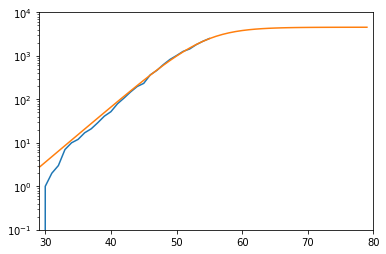

In [36]:
xr_log_it = np.arange(28,80)
plt.semilogy(xr,data_deaths_it,label="Italie")
plt.semilogy(xr_log_it,fit_logfunc(p1_it,xr_log_it))
plt.ylim(0.1,10000)
plt.xlim(29,80)

In [38]:
print(fit_logfunc(p1_it,1000))

4550.813430558903


Une asymptote à 4550 (déjà obsolete)

In [39]:
nb_deaths_it = np.zeros(data_deaths_it[30:].shape[0]-1)
for i in range(data_deaths_it[30:].shape[0]-1):
    nb_deaths_it[i] = (data_deaths_it[30+i+1]-data_deaths_it[30+i])

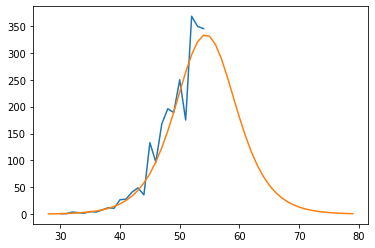

In [40]:
plt.plot(xr[30:-1],nb_deaths_it)
plt.plot(xr_log_it,fit_logfunc(p1_it,xr_log_it)**2*p1_it[1]/p1_it[0]*np.exp(-p1_it[1]*(xr_log_it-p1_it[2])))